In [11]:
import numpy as np
import pandas as pd
df = pd.read_csv("Pharma_Industry.csv")


In [14]:
# 1.	Load the dataset and perform fundamental data exploration
df.head()        # First 5 rows

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [16]:
df.tail()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0
499,-1.143726,0.715320,0.108560,-0.509787,-0.250704,1


In [18]:
df.shape         # (number_of_rows, number_of_columns)

(500, 6)

In [20]:
df.columns

Index(['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)', 'Drug Response'],
      dtype='object')

In [22]:
df.dtypes


Drug Dosage (mg)                  float64
Systolic Blood Pressure (mmHg)    float64
Heart Rate (BPM)                  float64
Liver Toxicity Index (U/L)        float64
Blood Glucose Level (mg/dL)       float64
Drug Response                       int64
dtype: object

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [26]:
df.describe()


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [28]:
df.isnull().sum()


Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [78]:
df.isnull().sum().sum()

0

In [30]:
df.duplicated().sum()


0

In [32]:
df.nunique()


Drug Dosage (mg)                  500
Systolic Blood Pressure (mmHg)    500
Heart Rate (BPM)                  500
Liver Toxicity Index (U/L)        500
Blood Glucose Level (mg/dL)       500
Drug Response                       2
dtype: int64

In [34]:
# 2.	Utilize histograms, box plots, or density plots to understand feature distributions.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)', 'Drug Response'],
      dtype='object')

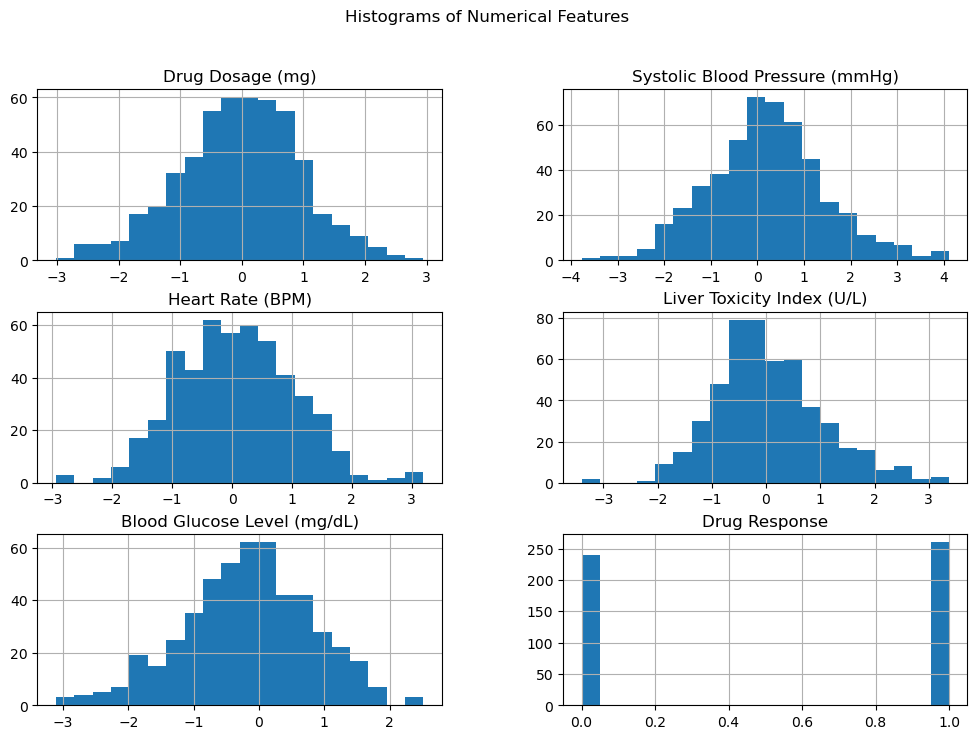

In [38]:
df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()


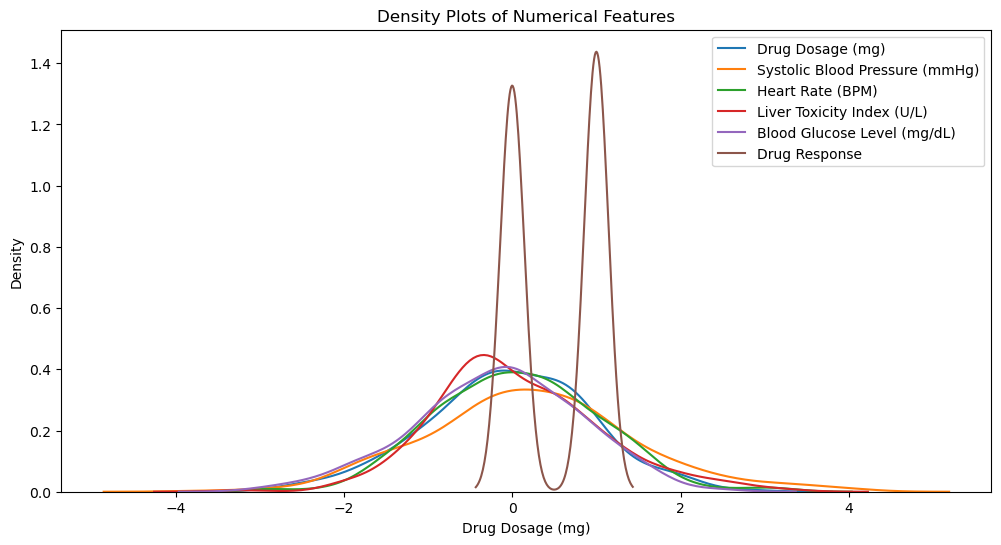

In [39]:
#Density
plt.figure(figsize=(12,6))
for col in num_cols:
    sns.kdeplot(df[col], label=col, fill=False)

plt.legend()
plt.title("Density Plots of Numerical Features")
plt.show()


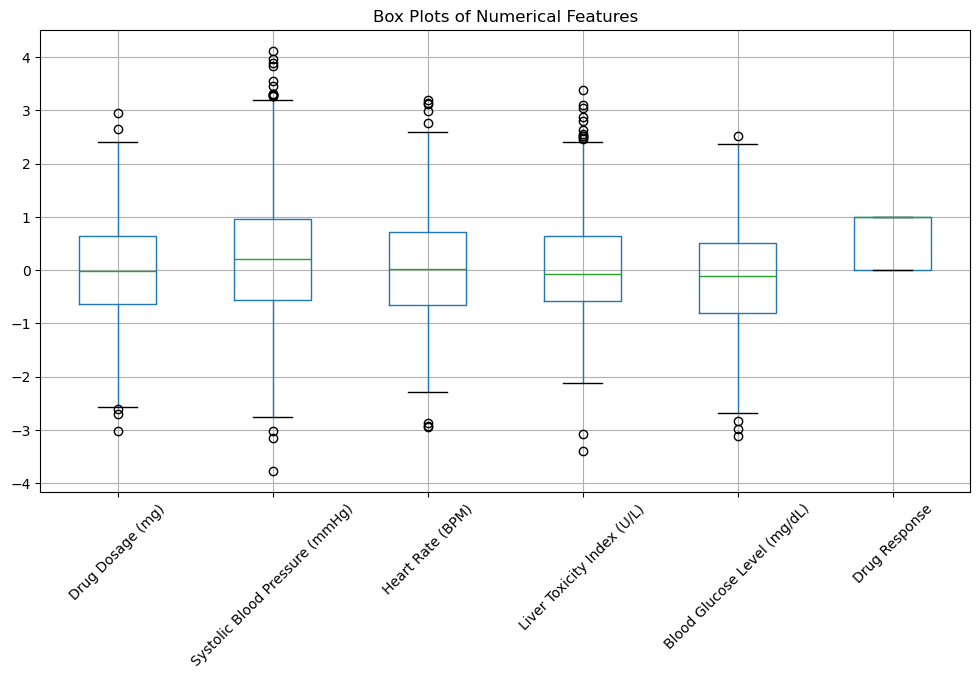

In [40]:
plt.figure(figsize=(12,6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Box Plots of Numerical Features")
plt.show()


In [41]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Keep only values inside the range
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
   
print("Outliers removed successfully.")

Outliers removed successfully.


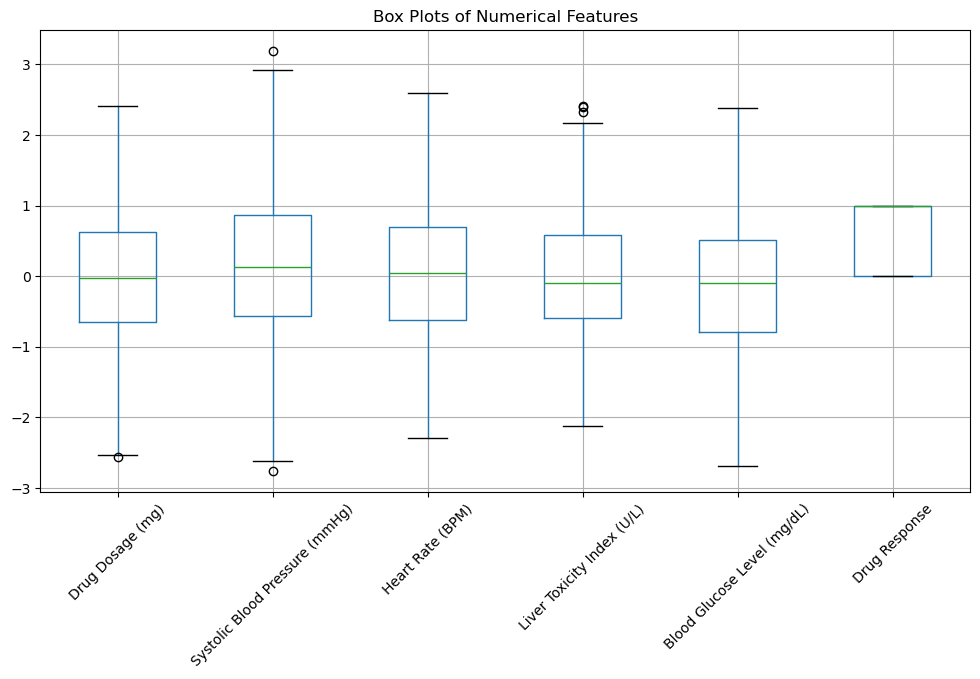

In [42]:
plt.figure(figsize=(12,6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Box Plots of Numerical Features")
plt.show()

In [43]:
# 3.	Investigate feature correlations to discern relationships within the data.
df[num_cols].corr()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
Drug Dosage (mg),1.000000,0.056449,0.038659,0.081727,-0.003891,0.015748
Systolic Blood Pressure (mmHg),0.056449,1.000000,-0.006968,0.173779,0.033560,0.290934
Heart Rate (BPM),0.038659,-0.006968,1.000000,0.045520,0.069644,0.000455
Liver Toxicity Index (U/L),0.081727,0.173779,0.045520,1.000000,0.237036,0.415662
Blood Glucose Level (mg/dL),-0.003891,0.033560,0.069644,0.237036,1.000000,0.192108
Drug Response,0.015748,0.290934,0.000455,0.415662,0.192108,1.000000


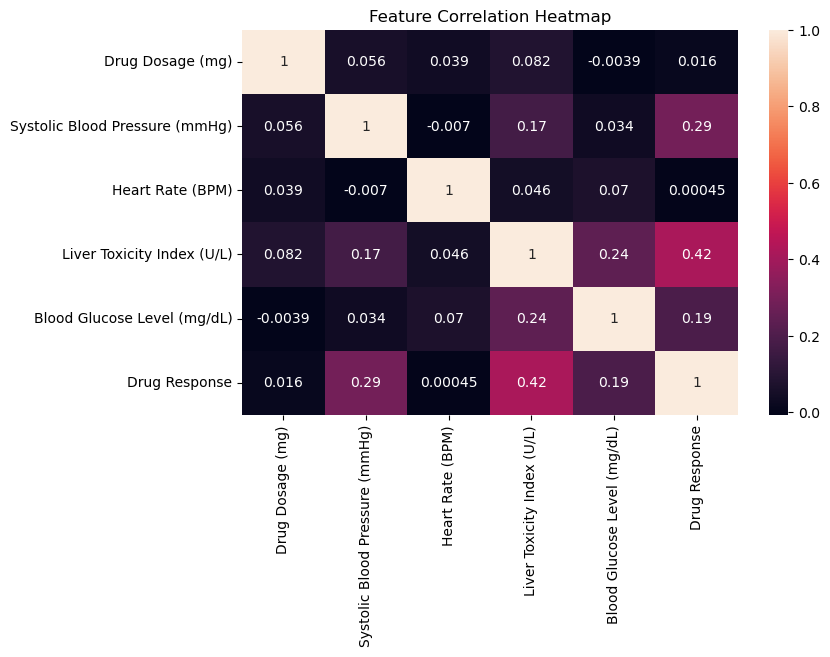

In [44]:
#Visualize Correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# 1.	Encode categorical variables if necessary.
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

In [63]:
X = df.drop(columns=["Drug Response"])
Y = df['Drug Response']

In [86]:
# 2.	Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 42,stratify=Y) # random_state 

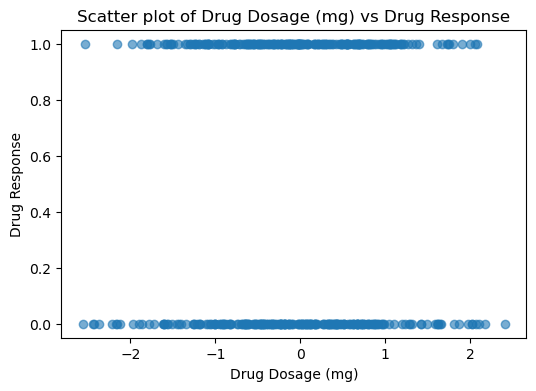

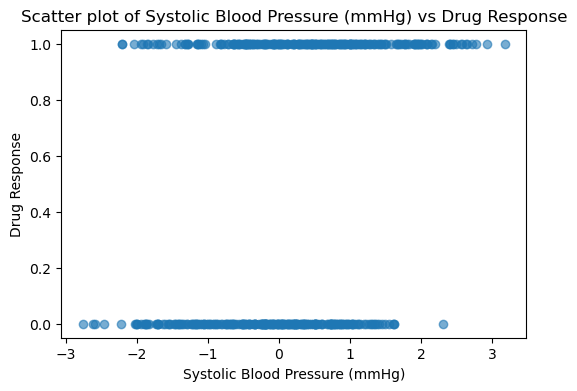

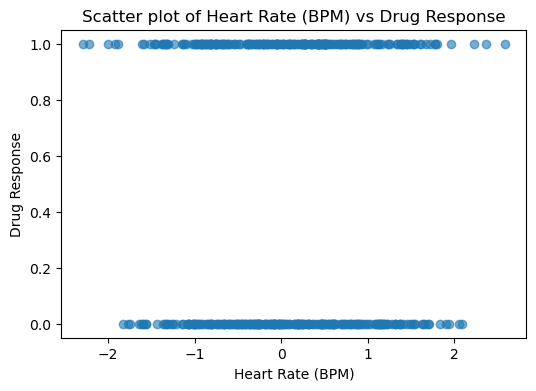

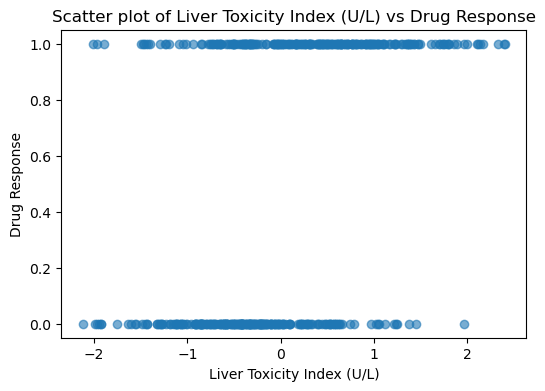

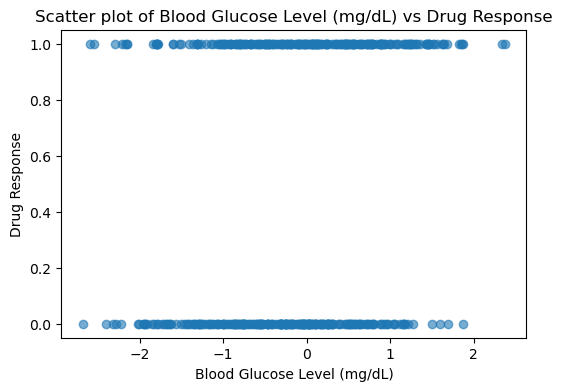

In [70]:
import matplotlib.pyplot as plt

# SCATTER PLOT 

for col in X.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(X[col], Y, alpha=0.6)
    plt.xlabel(col)
    plt.ylabel("Drug Response")   # replace with your target variable name
    plt.title(f"Scatter plot of {col} vs Drug Response")
    plt.show()


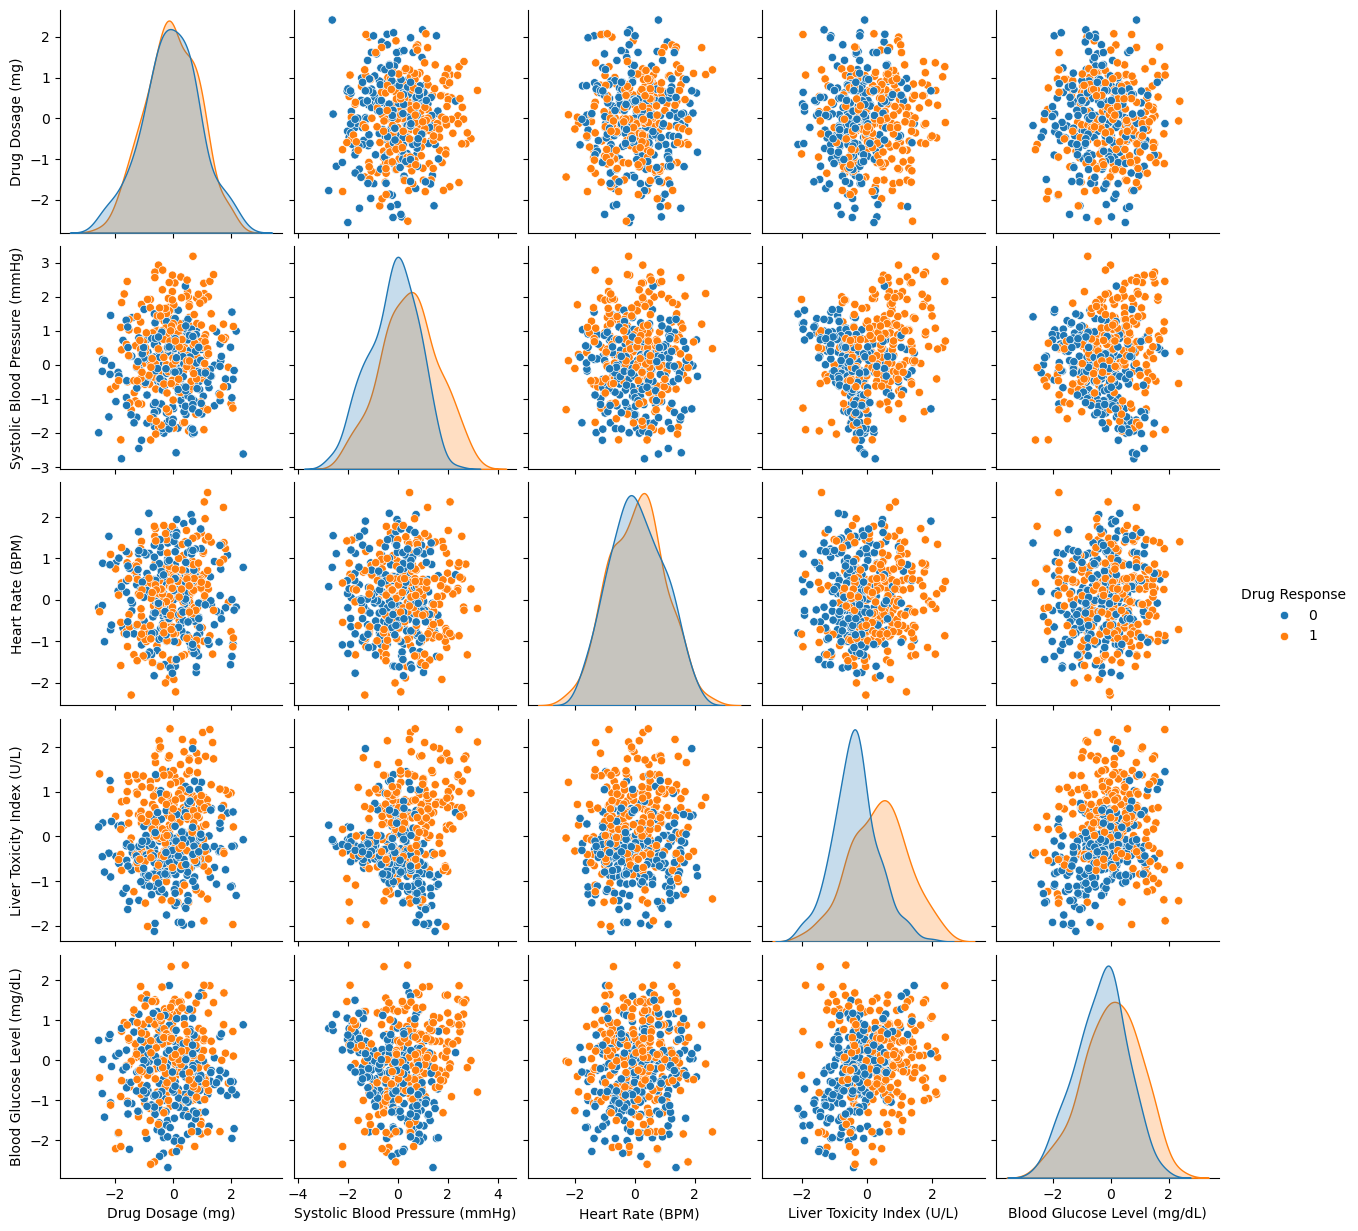

In [72]:
# pair plots
import seaborn as sns
df_pair = df.copy()
sns.pairplot(df_pair, hue="Drug Response")  # hue adds color by class
plt.show()


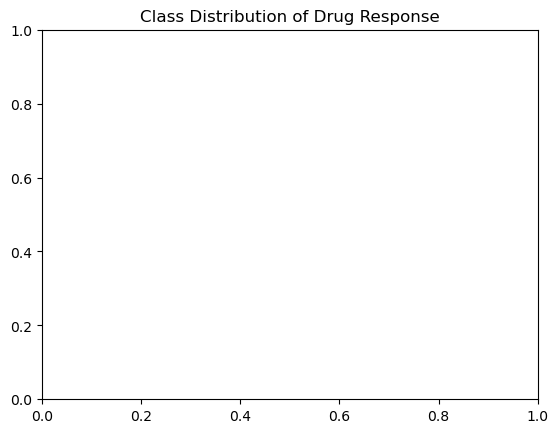

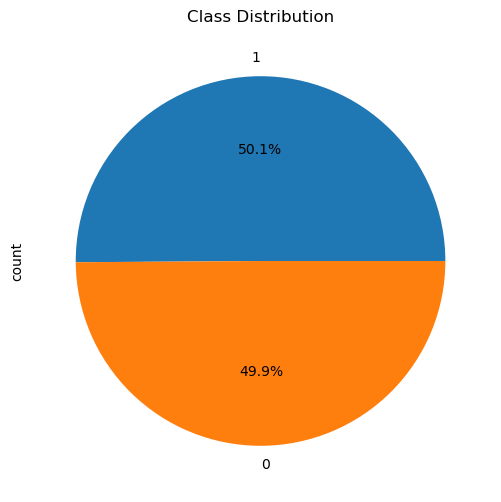

In [76]:
# 2 . Visualize class distributions to gauge dataset balance or imbalance.sns.countplot(x=Y)
plt.title("Class Distribution of Drug Response")
plt.show()

# Or as a pie chart
Y.value_counts().plot.pie(autopct="%1.1f%%", figsize=(6,6))
plt.title("Class Distribution")
plt.show()


In [100]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
SVM_model = SVC(kernel='linear',C=1)
SVM_model.fit(X_train,Y_train)
# Predictions
Y_pred = SVM_model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred, average="weighted"))
print("Recall:", recall_score(Y_test, Y_pred, average="weighted"))
print("F1-score:", f1_score(Y_test, Y_pred, average="weighted"))

Accuracy: 0.6666666666666666
Precision: 0.669000933706816
Recall: 0.6666666666666666
F1-score: 0.6658944360786132

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.72      0.68        46
           1       0.69      0.62      0.65        47

    accuracy                           0.67        93
   macro avg       0.67      0.67      0.67        93
weighted avg       0.67      0.67      0.67        93



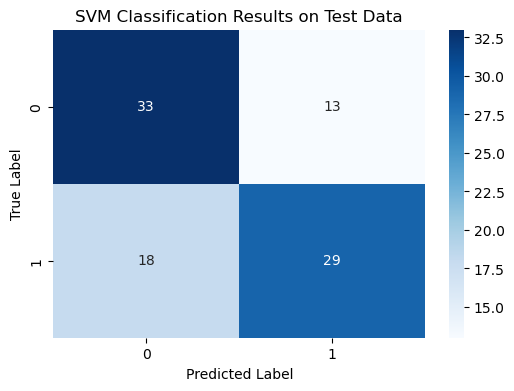

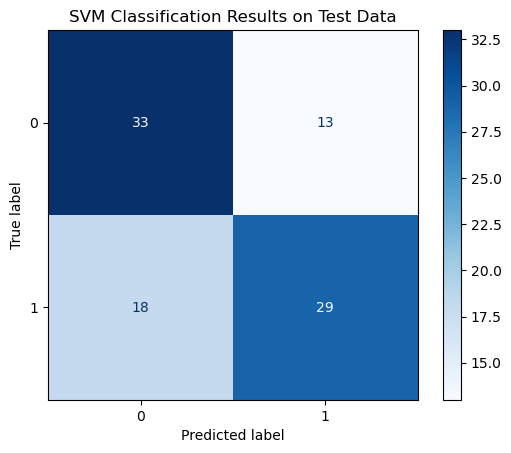


Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.72      0.68        46
           1       0.69      0.62      0.65        47

    accuracy                           0.67        93
   macro avg       0.67      0.67      0.67        93
weighted avg       0.67      0.67      0.67        93



In [124]:
# Task 5: Visualization of SVM Results
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predict on test data
Y_pred = svm_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# Option 1: Heatmap with seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title("SVM Classification Results on Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Option 2: Built-in ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("SVM Classification Results on Test Data")
plt.show()

# Classification Report (text summary)
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))



In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Initialize SVM
svm = SVC()

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.7405405405405405
Test Accuracy: 0.7419354838709677
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73        46
           1       0.73      0.77      0.75        47

    accuracy                           0.74        93
   macro avg       0.74      0.74      0.74        93
weighted avg       0.74      0.74      0.74        93

